# Clustering

![](https://scikit-learn.org/1.5/_images/sphx_glr_plot_cluster_comparison_001.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Clustering Problem

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(random_state=11)

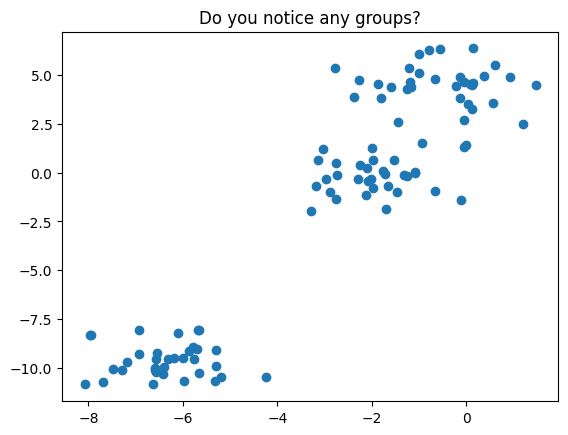

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Do you notice any groups?');

There are many clustering algorithms in sklearn -- let us use the KMeans and DBSCAN approach to cluster this data.

- [KMeans](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
- [DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [5]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Setup a pipeline to fit the KMeans clustering model, fit it to the data and plot the resulting clusters.

- [KMeans docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [ ]:
Kmeans_pipe = Pipeline([('scaler', StandardScaler(), )])

In [ ]:
for i in range (2, 10):
    Kmeans_pipe.set_params(kmeans__n_clusters = i)
    Kmeans_pipe.fit(X)

In [ ]:
dbscan.pipe = Pipeline([])

#### Evaluating Clusters

**Inertia**

Sum of squared differences between each point in a cluster and that cluster's centroid.

How dense is each cluster?

low inertia = dense cluster
ranges from 0 to very high values
$$ \sum_{j=0}^{n} (x_j - \mu_i)^2 $$
where $\mu_i$ is a cluster centroid

`.inertia_` is an attribute of a fitted sklearn's kmeans object

**Silhouette Score**

Tells you how much closer data points are to their own clusters than to the nearest neighbor cluster.

How far apart are the clusters?

ranges from -1 to 1
high silhouette score means the clusters are well separated
$$s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$$
Where:

$a_i$ = Cohesion: Mean distance of points within a cluster from each other.

$b_i$ = Separation: Mean distance from point $x_i$ to all points in the next nearest cluster.
Use scikit-learn: `metrics.silhouette_score(X_scaled, labels)`.

Higher silhouette score is better!¶

### Hidden Markov Models











<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/HiddenMarkovModel.svg/600px-HiddenMarkovModel.svg.png />
</center>

In [6]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [7]:
import yfinance as yf

In [8]:
btcn = yf.Ticker('BTC-USD')

In [9]:
btcn = btcn.history()

In [10]:
btcn.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-12 00:00:00+00:00,88705.562500,89956.882812,85155.109375,87955.812500,133673285375,0.0,0.0
2024-11-13 00:00:00+00:00,87929.968750,93434.351562,86256.929688,90584.164062,123559027869,0.0,0.0
2024-11-14 00:00:00+00:00,90574.882812,91765.218750,86682.812500,87250.429688,87616705248,0.0,0.0
2024-11-15 00:00:00+00:00,87284.179688,91868.742188,87124.898438,91066.007812,78243109518,0.0,0.0
2024-11-16 00:00:00+00:00,91064.367188,91763.945312,90094.226562,90558.476562,44333192814,0.0,0.0


<Axes: xlabel='Date'>

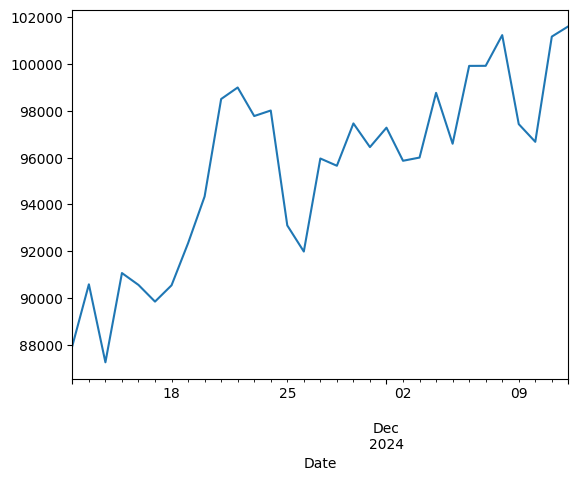

In [11]:
#plot it
btcn['Close'].plot()

### HMMLearn

We will use the `hmmlearn` library to implement our hidden markov model.  Here, we use the `GaussianHMM` class.  Depending on the nature of your data you may be interested in a different probability distribution.

- **HMM Learn**: [here](https://hmmlearn.readthedocs.io/en/latest/tutorial.html)

In [12]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.2 MB/s eta 0:00:00


In [13]:
from hmmlearn import hmm

In [17]:
#instantiate
model = hmm.GaussianHMM(n_components=2)

In [18]:
#fit
X = btcn['2021':][['Close']]

In [19]:
X

,Close
Date,
2024-11-12 00:00:00+00:00,87955.812500
2024-11-13 00:00:00+00:00,90584.164062
2024-11-14 00:00:00+00:00,87250.429688
2024-11-15 00:00:00+00:00,91066.007812
2024-11-16 00:00:00+00:00,90558.476562
2024-11-17 00:00:00+00:00,89845.851562
2024-11-18 00:00:00+00:00,90542.640625
2024-11-19 00:00:00+00:00,92343.789062
2024-11-20 00:00:00+00:00,94339.492188


In [20]:
model.fit(X)

GaussianHMM(n_components=2)

In [21]:
#predict
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

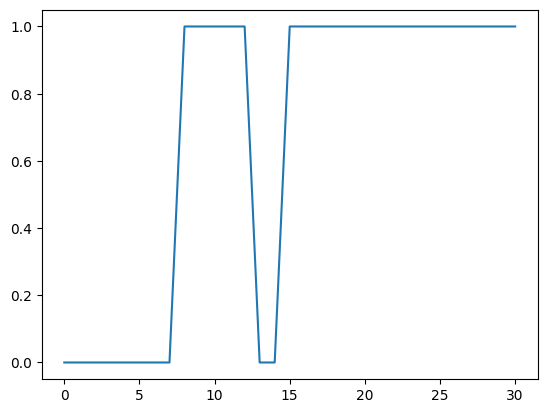

In [22]:
#look at our predictions
plt.plot(model.predict(X))

### Looking at Speech Files

For a deeper dive into HMM's for speech recognition please see Rabner's article A tutorial on hidden Markov models and selected applications in speech recognition [here](https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf).

In [23]:
from scipy.io import wavfile

In [24]:
!ls sounds/apple

ls: cannot access 'sounds/apple': No such file or directory


In [25]:
#read in the data and structure
rate, apple = wavfile.read('sounds/apple/apple01.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'sounds/apple/apple01.wav'

In [ ]:
#plot the sound
plt.plot(apple)

In [ ]:
#look at another sample
rate, kiwi = wavfile.read('sounds/kiwi/kiwi01.wav')

In [ ]:
#kiwi's perhaps
plt.plot(kiwi)

In [ ]:
from IPython.display import Audio

In [ ]:
#take a listen to an apple
Audio('sounds/banana/banana02.wav')

### Generating Features from Audio: Mel Frequency Cepstral Coefficient

Big idea here is to extract the important elements that allow us to identify speech.  For more info on the MFCC, see [here](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/).

In [26]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=c22a63df753154423e7813d8537ebb103be926f953fe82fb1bef615cf38648e4
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [29]:
import python_speech_features as features

#extract the mfcc features
mfcc_features = features.mfcc(kiwi)

#plot them
plt.plot(mfcc_features);

#determine our x and y
X = features.mfcc(kiwi)
y = ['kiwi']

NameError: name 'kiwi' is not defined

In [28]:
import os

In [30]:
#make a custom markov class to return scores
class MakeMarkov:

    def __init__(self, n_components = 3):
        self.components = n_components
        self.model = hmm.GaussianHMM(n_components=self.components)

    def fit(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model

    def score(self, X):
        self.score = self.fit_model.score(X)
        return self.score



In [31]:
kiwi_model = MakeMarkov()
kiwi_model.fit(X)
kiwi_model.score(X)

-281.20910704588636

In [35]:
hmm_models = []
labels = []
for file in os.listdir('sounds'):
    sounds = os.listdir(f'sounds/{file}')
    sound_files = [f'sounds/{file}/{sound}' for sound in sounds]
    for sound in sound_files[:-1]:
        rate, data = wavfile.read(sound)
        X = features.mfcc(data)
        mmodel = MakeMarkov()
        mmodel.fit(X)
        hmm_models.append(mmodel)
        labels.append(file)



FileNotFoundError: [Errno 2] No such file or directory: 'sounds'

In [ ]:
#write a loop that bops over the files and prints the label based on
#highest score



### Making Predictions

Now that we have our models, given a new sound we want to score these based on what we've learned and select the most likely example.

In [33]:
in_files = ['sounds/pineapple/pineapple15.wav',
           'sounds/orange/orange15.wav',
           'sounds/apple/apple15.wav',
           'sounds/kiwi/kiwi15.wav']

In [34]:
for modek in hmm_models:

    print(modek.score(features.mfcc(wavfile.read(in_files[0])[1])))

### Further Reading

- **Textbook**: Marsland's *Machine Learning: An Algorithmic Perspective* has a great overview of HMM's.
- **Time Series Examples**: Checkout Aileen Nielsen's tutorial from [SciPy 2019](https://www.youtube.com/watch?v=v5ijNXvlC5A) and her book *Practical Time Series Analysis*
- **Speech Recognition**: Rabiner's [*A tutorial on hidden Markov models and selected applications in speech recognition*]('readings/rabiner.pdf')
- **HMM;s and Dynamic Programming**: Avik Das' PyData Talk [*Dynamic Programming for Machine Learning: Hidden Markov Models*](https://www.youtube.com/watch?v=MADX-L75ub8)